# Install missing dependencies



In [1]:
! pip install dropbox
! pip install pyLDAvis
! pip install pyLDAvis.gensim
! pip install --upgrade pandas==1.2
! pip install wordcloud
! pip install gensim
! pip install nltk
!pip install plotly
!pip install --upgrade nbformat
! pip install xlrd
! pip install openpyxl

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Using cached future-0.18.2.tar.gz (829 kB)
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136897 sha256=655972d7571c5a3c0139e2272d25c8f151888f2974ff8606592f4e757c8c4326
  Stored in directory: c:\users\13098\appdata\local\pip\cache\wheels\90\61\ec\9dbe9efc3acf9c4e37ba70fbbcc3f3a0ebd121060aa593181a
  Created wheel for future: filename=future-0.18.2-py3-none-any.whl size=491070 sha256=ac4f60c4ef5a00ed118e8ad2cd31999a60b5705abfa394426f332ec719f8f719
  Stored in directory: c:\users\13098\appdata\local\pip\cache\wheels\8e\70\28\3d6ccd6e315f65f245d

ERROR: Could not find a version that satisfies the requirement pyLDAvis.gensim
ERROR: No matching distribution found for pyLDAvis.gensim


  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.4
    Uninstalling pandas-1.3.4:
      Successfully uninstalled pandas-1.3.4


# Add Import statements

In [37]:
import dropbox
import pandas as pd
import re
import numpy as np
from wordcloud import WordCloud
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import gensim.corpora as corpora
import pyLDAvis
import pyLDAvis.gensim_models 
import pickle 
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import numpy as np

import os

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\13098\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Load required Functions

In [94]:
# All constants are defined below

JOBS_2021 = {0: {'Computer Vision': 13193,'Machine Learning': 11431,'NLP': 1116,'Robotics': 8155},
1: {'Computer Vision': 46082,'Machine Learning': 29335,'NLP': 4539,'Robotics': 26901},
2: {'Computer Vision': 66732,'Machine Learning': 41589,'NLP': 7209,'Robotics': 36971},
3: {'Computer Vision': 78026,'Machine Learning': 49766,'NLP': 9133,'Robotics': 43486},
4: {'Computer Vision': 108129,'Machine Learning': 71433,'NLP': 13204,'Robotics': 61530},
5: {'Computer Vision': 108129,'Machine Learning': 71433,'NLP': 13204,'Robotics': 61530},
6: {'Computer Vision': 108129,'Machine Learning': 71433,'NLP': 13204,'Robotics': 61530},
7: {'Computer Vision': 108129,'Machine Learning': 71433,'NLP': 13204,'Robotics': 61530},
8: {'Computer Vision': 108129,'Machine Learning': 71433,'NLP': 13204,'Robotics': 61530},
9: {'Computer Vision': 108129,'Machine Learning': 71433,'NLP': 13204,'Robotics': 61530},
10: {'Computer Vision': 108129,'Machine Learning': 71433,'NLP': 13204,'Robotics': 61530},
11: {'Computer Vision': 108191,'Machine Learning': 71566,'NLP': 13211,'Robotics': 61581}}

NLP_RP = [4709, 5307, 6161, 8664, 8998, 8418, 9167, 11765, 17072, 19756, 23792, 24597]
CV_RP = [85435, 107570, 100230, 127592, 127890, 117969, 124821, 145425, 171668, 188032, 225009,188703]
ML_RP = [592242, 676729, 686770, 748257, 786282, 793407, 824052, 860178, 913105, 958714, 1076459, 968895]
ROBOTICS_RP = [49897, 63415, 65564, 79098, 77960, 81594, 85408,101938,114197,129827,144779,132186]


LABELS_YEARS=[2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021]
LABELS_MONTHS = ["JAN","FEB","MAR","APR","MAY","JUN","JUL","AUG","SEPT","OCT","NOV","DEC"]

# below are the coluns that needs to be dropped from all research papers data
PAPERS_COLUMNS_TO_DROP = ['DOI', 'PMID', 'PMCID','Acknowledgements','Anthology title','Publisher',
       'MeSH terms', 'PubYear', 'Publication Date (online)',
       'Publication Date (print)', 'Volume', 'Issue', 'Pagination',
       'Open Access', 'Publication Type',
       'Authors (Raw Affiliation)', 'Corresponding Author',
       'Authors Affiliations', 'Research Organizations - standardized',
       'GRID IDs', 'City of Research organization',
       'State of Research organization', 'Country of Research organization',
       'Funder', 'Funder Group', 'Funder Country', 'UIDs of supporting grants',
       'Supporting Grants', 'Recent citations', 'RCR', 'FCR',
       'Altmetric',
       'FOR (ANZSRC) Categories', 'RCDC Categories', 'HRCS HC Categories',
       'HRCS RAC Categories', 'ICRP Cancer Types', 'ICRP CSO Categories',
       'Units of Assessment', 'Sustainable Development Goals']

# Constant stop words whhich are to be removed from NLP papers
STOP_WORDS_NLP = stopwords.words('english')
STOP_WORDS_NLP.extend(['many','found','various','current','within','including','paper','propose','two','show','new', 'form', 'used', 'first', 'task','contecxt','set','work','finally','use','well','type','different','one','user','using','make','state','art','state art','provide','make','help','case','based','patent','related'])
# Constant stop words whhich are to be removed from CV papers
STOP_WORDS_CV = stopwords.words('english')
STOP_WORDS_CV.extend(['effect','proposed', 'method', 'conclusion', 'compared', 'present', 'region', 'patient', 'area',  'many','found','various','current','within','including','paper','propose','two','show','new', 'form', 'used', 'first', 'task','contecxt','set','work','finally','use','well','type','different','one','user','using','make','state','art','state art','provide','make','help','case','based','patent','related'])
# Constant stop words whhich are to be removed from ML papers
STOP_WORDS_ML = stopwords.words('english')
STOP_WORDS_ML.extend([ 'may', 'individual', 'conclusion', 'moreover', 'level', 'three', 'many','found','various','current','within','including','paper','propose','two','show','new', 'form', 'used', 'first', 'task','contecxt','set','work','finally','use','well','type','different','one','user','using','make','state','art','state art','provide','make','help','case','based','patent','related'])
# Constant stop words whhich are to be removed from ROB papers
STOP_WORDS_ROB = stopwords.words('english')
STOP_WORDS_ROB.extend([ 'conclusion','need', 'due', 'long term', 'without', 'may','many','found','various','current','within','including','paper','propose','two','show','new', 'form', 'used', 'first', 'task','contecxt','set','work','finally','use','well','type','different','one','user','using','make','state','art','state art','provide','make','help','case','based','patent','related'])

# Required functions are defined below

def download_data(files_to_download):  
  '''This function downloads the files from dropbox, it takes one required parameter,i.e., the dictionary of filenames and file paths'''
  access_token = "q9CgFnFowuoAAAAAAAAAAYuIHtODAmfFwbX43T_7slE1DgWSTF4_UdK-h6QmPl6z"
  dbx = dropbox.Dropbox(access_token)

  for file_name,path in files_to_download.items():
    if(not os.path.exists(file_name)):
      with open(file_name, "wb") as f:
          metadata, res = dbx.files_download(path=path)
          f.write(res.content)

def allign_column_names(df):
  ''' This function remove sthe extra column in the research papers dataset and allign the index to proper columns,\n
      take one required parameter dataframe which needs to be procesed'''
  new_header = df.iloc[0]
  df = df[1:]
  df.columns = new_header
  return df


def drop_columns(df,drop_columns = []):
  df = df.drop(columns = drop_columns)
  df = df.dropna(subset=['Abstract'])
  return df

def preprocessing_text(df,column_to_preprocess = "Abstract"):
  # Remove punctuation
  df["paper_text_processed"] = df[column_to_preprocess].replace(np.nan, '').map(lambda x: re.sub('[,\\.!?]', '', x))
  # Convert the titles to lowercase
  df["paper_text_processed"] = df[column_to_preprocess].replace(np.nan, '').map(lambda x: x.lower())
  return df

def generate_word_colud(combined_text):
  # Create a WordCloud object
  wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
  # Generate a word cloud
  wordcloud.generate(combined_text)
  # Visualize the word cloud
  return wordcloud.to_image()


def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts,stop_words):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

def tokenize_and_eliminate_stop_words(df,stop_words = []):
  data = df.paper_text_processed.values.tolist()
  data_words = list(sent_to_words(data))
  # remove stop words
  data_words = remove_stopwords(data_words,stop_words)
  return data_words


def generate_corpus_and_lda_model(preprocessed_words,num_topics = 10):
  # Create Dictionary
  id2word = corpora.Dictionary(preprocessed_words)
  # Create Corpus
  texts = preprocessed_words
  # Term Document Frequency
  corpus = [id2word.doc2bow(text) for text in texts]

  # Build LDA model
  lda_model = gensim.models.LdaMulticore(corpus=corpus,id2word=id2word,num_topics=num_topics)
  # Print the Keyword in the 10 topics
  print(lda_model.print_topics())
  doc_lda = lda_model[corpus]
  return lda_model,corpus,id2word


def visLDA(model,num_topics):
  # Visualize the topics  /content/Robotics_papers.xlsx
  pyLDAvis.enable_notebook()
  LDAvis_data_filepath = os.path.join('./content/ldavis_prepared_'+str(num_topics))
  # # this is a bit time consuming - make the if statement True
  # # if you want to execute visualization prep yourself
  LDAvis_prepared = pyLDAvis.gensim_models.prepare(*model,sort_topics=False)
  with open(LDAvis_data_filepath, 'wb') as f:
      pickle.dump(LDAvis_prepared, f)
  # load the pre-prepared pyLDAvis data from disk
  with open(LDAvis_data_filepath, 'rb') as f:
      LDAvis_prepared = pickle.load(f)
  pyLDAvis.save_html(LDAvis_prepared, './content/ldavis_prepared_'+ str(num_topics) +'.html')
  return LDAvis_prepared

def plot_difference_plotly(mdiff, title="", annotation=None):
  '''Plot the difference between models.

  Uses plotly as the backend.'''
  import plotly.graph_objs as go
  import plotly.offline as py

  annotation_html = None
  if annotation is not None:
      annotation_html = [
          [
              "+++ {}<br>--- {}".format(", ".join(int_tokens), ", ".join(diff_tokens))
              for (int_tokens, diff_tokens) in row
          ]
          for row in annotation
      ]

  data = go.Heatmap(z=mdiff, colorscale='RdBu', text=annotation_html)
  layout = go.Layout(width=950, height=950, title=title, xaxis=dict(title="topic"), yaxis=dict(title="topic"))
  py.iplot(dict(data=[data], layout=layout))

# Visualize Full Data

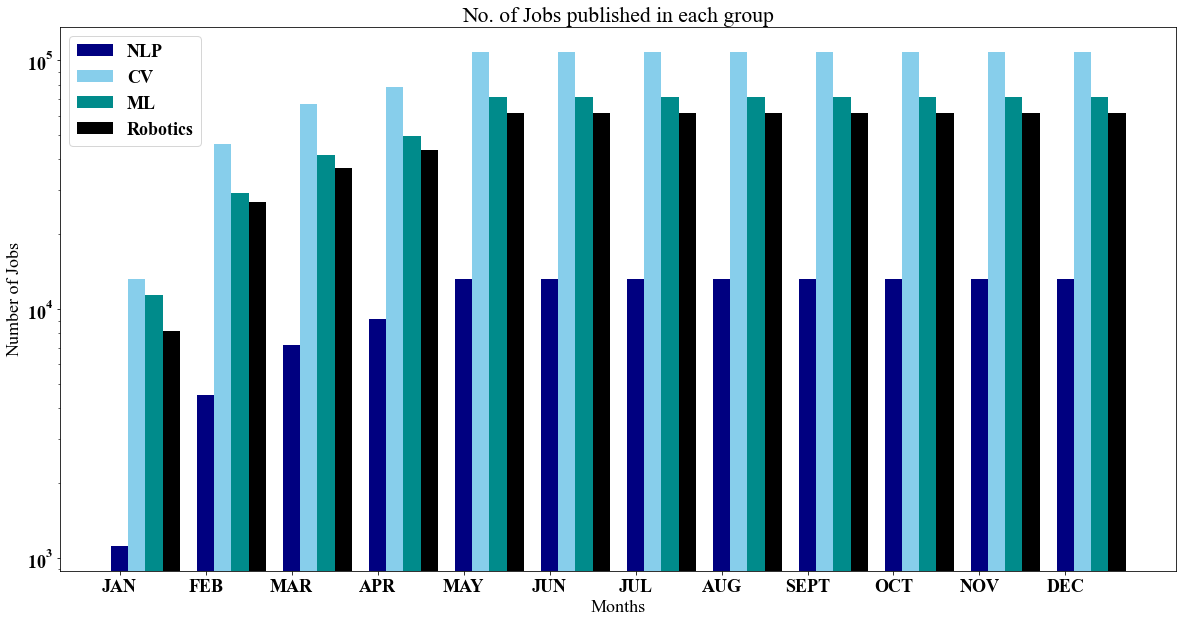

In [101]:

months = list(JOBS_2021.keys())
CV_JB = [count for d in JOBS_2021.values() for name,count in d.items() if name == "Computer Vision"] 
NLP_JB = [count for d in JOBS_2021.values() for name,count in d.items() if name == "NLP"] 
ML_JB = [count for d in JOBS_2021.values() for name,count in d.items() if name == "Machine Learning"]
Robotics_JB = [count for d in JOBS_2021.values() for name,count in d.items() if name == "Robotics"]

figure(num=None, figsize=(20, 10))

y_pos=np.arange(len(LABELS_MONTHS))
plt.bar(y_pos +0 , NLP_JB,width=0.2, color = 'navy' , label='NLP')
plt.bar(y_pos+0.2 ,CV_JB, width=0.2,color = 'skyblue',label = 'CV')
plt.bar(y_pos +0.4 , ML_JB,width=0.2, color = 'darkcyan' , label='ML')
plt.bar(y_pos+0.6, Robotics_JB,width=0.2, color = 'black' , label='Robotics')

plt.xticks(y_pos, LABELS_MONTHS)
plt.yscale('log')
plt.legend(['NLP','CV','ML','Robotics'])
plt.ylabel('Number of Jobs')
plt.xlabel('Months')
plt.title("No. of Jobs published in each group")
plt.show()


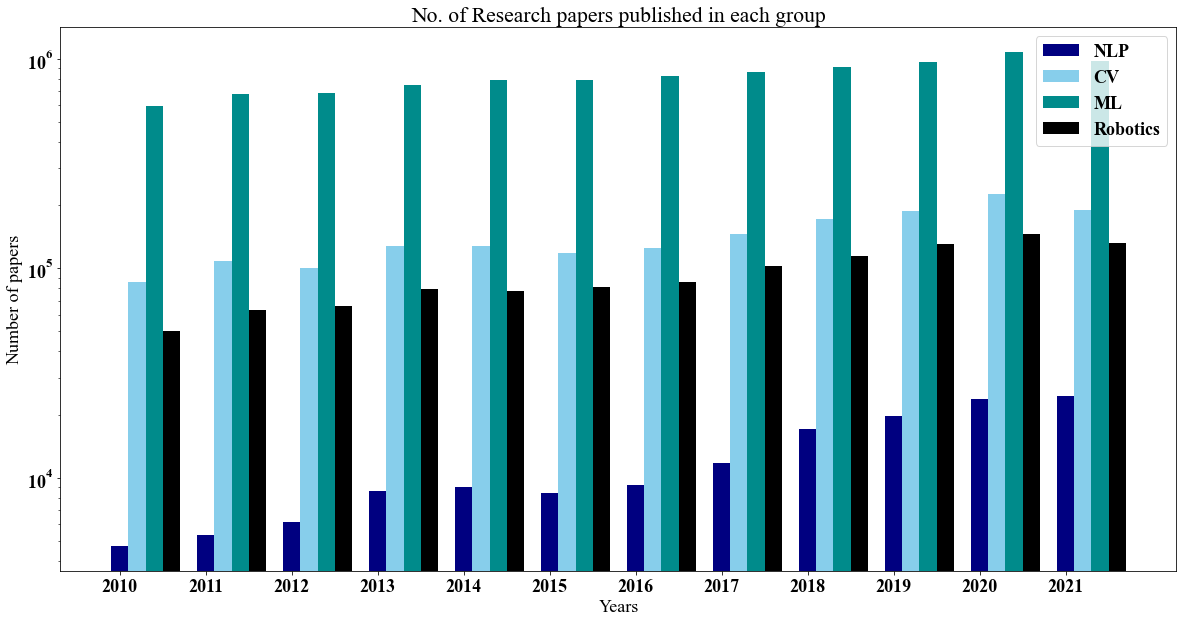

In [100]:

figure(num=None, figsize=(20, 10))

y_pos=np.arange(len(LABELS_YEARS))
plt.bar(y_pos +0 , NLP_RP,width=0.2, color = 'navy' , label='NLP')
plt.bar(y_pos+0.2 ,CV_RP, width=0.2,color = 'skyblue',label = 'CV')
plt.bar(y_pos +0.4 , ML_RP,width=0.2, color = 'darkcyan' , label='ML')
plt.bar(y_pos+0.6, ROBOTICS_RP,width=0.2, color = 'black' , label='Robotics')

plt.xticks(y_pos, LABELS_YEARS)
plt.yscale('log')
plt.legend(['NLP','CV','ML','Robotics'])
plt.ylabel('Number of papers')
plt.xlabel('Years')
plt.title("No. of Research papers published in each group")
plt.show()
# plt.savefig('figure_name.pdf', dpi=300)

In [47]:
%debug

> c:\users\13098\anaconda3\envs\ml\lib\site-packages\numpy\lib\stride_tricks.py(420)_broadcast_shape()
    418     # use the old-iterator because np.nditer does not handle size 0 arrays
    419     # consistently
--> 420     b = np.broadcast(*args[:32])
    421     # unfortunately, it cannot handle 32 or more arguments directly
    422     for pos in range(32, len(args), 31):

> c:\users\13098\anaconda3\envs\ml\lib\site-packages\numpy\lib\stride_tricks.py(538)broadcast_arrays()
    536     args = [np.array(_m, copy=False, subok=subok) for _m in args]
    537 
--> 538     shape = _broadcast_shape(*args)
    539 
    540     if all(array.shape == shape for array in args):

> <__array_function__ internals>(5)broadcast_arrays()

> c:\users\13098\anaconda3\envs\ml\lib\site-packages\matplotlib\axes\_axes.py(2342)bar()
   2340                 yerr = self._convert_dx(yerr, y0, y, self.convert_yunits)
   2341 
-> 2342         x, height, width, y, linewidth, hatch = np.broadcast_arrays(
   2343 

# Download  and Read data

In [5]:
files_to_download = {'NLP_papers.csv':"/corelation between jobs and research papers/NLP.csv",
                      'CV_papers.xlsx':"/corelation between jobs and research papers/Computer Vision.xlsx",
                      'ML_papers.xlsx':"/corelation between jobs and research papers/ML.xlsx",
                      'Robotics_papers.xlsx':"/corelation between jobs and research papers/Robotics.csv.xlsx"
                      }

files_to_download = {'NLP_papers16.csv':"/corelation between jobs and research papers/NLP2016.csv",
                      'CV_papers16.csv':"/corelation between jobs and research papers/ComputerVision2016.csv",
                      'ML_papers16.csv':"/corelation between jobs and research papers/ML2016.csv",
                      'Robotics_papers16.csv':"/corelation between jobs and research papers/Robotics2016.csv"
                      }

download_data(files_to_download)   
# NLP_df = pd.read_csv("NLP_papers.csv")
# CV_df = pd.read_excel("CV_papers.xlsx")
# ML_df = pd.read_excel("ML_papers.xlsx")
# Rob_df = pd.read_excel("Robotics_papers.xlsx")

# for 2016 data
NLP_df = pd.read_csv("NLP_papers16.csv")
CV_df = pd.read_csv("CV_papers16.csv")
ML_df = pd.read_csv("ML_papers16.csv")
Rob_df = pd.read_csv("Robotics_papers16.csv")

C:\Users\13098\anaconda3\envs\ml\lib\site-packages\IPython\core\interactiveshell.py:3172: DtypeWarning: Columns (0,3,12,15,34,35,36,37,38) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\13098\anaconda3\envs\ml\lib\site-packages\IPython\core\interactiveshell.py:3172: DtypeWarning: Columns (0,3,4,11,12,34,35,36,37,38) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# Prepocessing and Filtering data

In [6]:
NLP_df = allign_column_names(NLP_df)
CV_df = allign_column_names(CV_df)
ML_df = allign_column_names(ML_df)
Rob_df = allign_column_names(Rob_df)


NLP_df = drop_columns(NLP_df,drop_columns = PAPERS_COLUMNS_TO_DROP)
CV_df = drop_columns(CV_df,drop_columns = PAPERS_COLUMNS_TO_DROP)
ML_df = drop_columns(ML_df,drop_columns = PAPERS_COLUMNS_TO_DROP)
Rob_df = drop_columns(Rob_df,drop_columns = PAPERS_COLUMNS_TO_DROP)

NLP_df = preprocessing_text(NLP_df,column_to_preprocess = "Abstract")
CV_df = preprocessing_text(CV_df,column_to_preprocess = "Abstract")
ML_df = preprocessing_text(ML_df,column_to_preprocess = "Abstract")
Rob_df = preprocessing_text(Rob_df,column_to_preprocess = "Abstract")


In [7]:
NLP_df.head()

,Rank,Publication ID,Title,Abstract,Source title,Authors,Times cited,Source Linkout,Dimensions URL,paper_text_processed
1,505,pub.1013193718,Mitotic regulator Nlp interacts with XPA/ERCC1...,"Cellular response to DNA damage, including ion...",Cancer Letters,"Ma, Xiao-Juan; Shang, Li; Zhang, Wei-Min; Wang...",4,NaN,https://app.dimensions.ai/details/publication/...,"cellular response to dna damage, including ion..."
2,457,pub.1055130526,Lipid Cross-Linking of Nanolipoprotein Particl...,Nanolipoprotein particles (NLPs) consist of a ...,ACS Applied Materials & Interfaces,"Gilmore, Sean F.; Blanchette, Craig D.; Schara...",11,https://escholarship.org/content/qt21p0v5gf/qt...,https://app.dimensions.ai/details/publication/...,nanolipoprotein particles (nlps) consist of a ...
3,423,pub.1069286838,Natural Language Processing–Enabled and Conven...,BACKGROUND: The process of documentation in el...,JMIR Medical Informatics,"Kaufman, David R; Sheehan, Barbara; Stetson, P...",25,https://doi.org/10.2196/medinform.5544,https://app.dimensions.ai/details/publication/...,background: the process of documentation in el...
4,405,pub.1065239942,Investigation of noise-like pulses from a net ...,We investigated the characteristics of noise-l...,Optics Letters,"Lin, Ja-Hon; Chen, Chien-Lin; Chan, Chen-Wei; ...",23,NaN,https://app.dimensions.ai/details/publication/...,we investigated the characteristics of noise-l...
5,390,pub.1051528193,Versatile patterns of multiple rectangular noi...,We report on the generation of versatile patte...,Optics Express,"Huang, Yu-Qi; Qi, You-Li; Luo, Zhi-Chao; Luo, ...",42,https://doi.org/10.1364/oe.24.007356,https://app.dimensions.ai/details/publication/...,we report on the generation of versatile patte...


# Generate Word Cloud

C:\Users\13098\anaconda3\envs\ml\lib\site-packages\matplotlib_inline\config.py:66: DeprecationWarning: InlineBackend._figure_formats_changed is deprecated in traitlets 4.1: use @observe and @unobserve instead.
  def _figure_formats_changed(self, name, old, new):


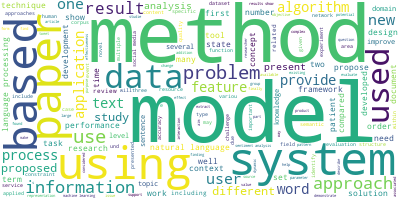

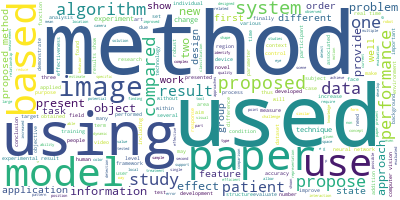

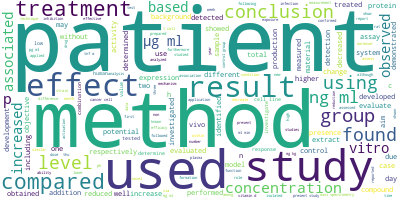

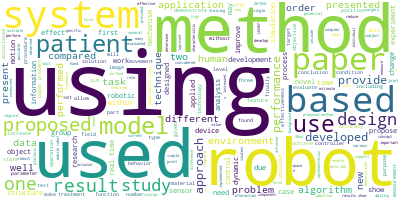

In [8]:
# Join the different processed titles together.
long_string = ','.join(list(NLP_df['paper_text_processed'].values))
display(generate_word_colud(long_string))

long_string = ','.join(list(CV_df['paper_text_processed'].values))
display(generate_word_colud(long_string))

long_string = ','.join(list(ML_df['paper_text_processed'].values))
display(generate_word_colud(long_string))

long_string = ','.join(list(Rob_df['paper_text_processed'].values))
display(generate_word_colud(long_string))

# Tokeniziing the text and removing stop words

In [9]:
NLP_data_words  = tokenize_and_eliminate_stop_words(NLP_df,STOP_WORDS_NLP)
CV_data_words  = tokenize_and_eliminate_stop_words(CV_df,STOP_WORDS_CV)
ML_data_words  = tokenize_and_eliminate_stop_words(ML_df,STOP_WORDS_ML)
rob_data_words  = tokenize_and_eliminate_stop_words(Rob_df,STOP_WORDS_ROB)

# Generate Word cloud again after removing stop words

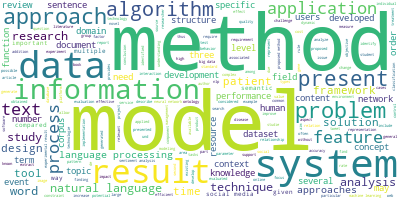

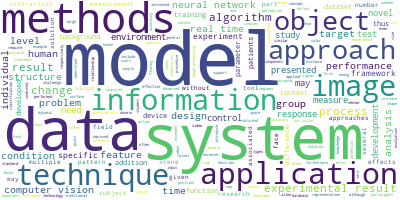

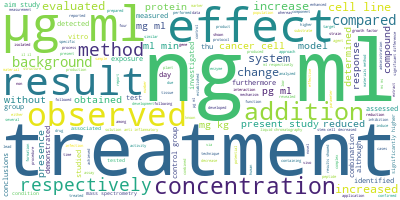

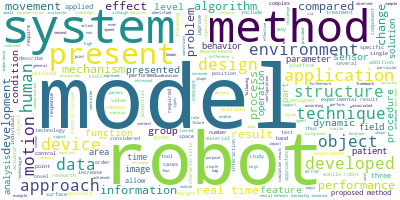

In [10]:
# Join the different processed titles together.
words = [" ".join(w) for w in NLP_data_words]
long_string = ','.join(words)

display(generate_word_colud(long_string))

# Join the different processed titles together.
words = [" ".join(w) for w in CV_data_words]
long_string = ','.join(words)

display(generate_word_colud(long_string))


# Join the different processed titles together.
words = [" ".join(w) for w in ML_data_words]
long_string = ','.join(words)

display(generate_word_colud(long_string))

# Join the different processed titles together.
words = [" ".join(w) for w in rob_data_words]
long_string = ','.join(words)

display(generate_word_colud(long_string))

# Generate LDA models

In [11]:
num_topics = 15
NLP_model = generate_corpus_and_lda_model(NLP_data_words,num_topics = num_topics)
CV_model = generate_corpus_and_lda_model(CV_data_words,num_topics = num_topics)
ML_model = generate_corpus_and_lda_model(ML_data_words,num_topics = num_topics)
rob_model = generate_corpus_and_lda_model(rob_data_words,num_topics = num_topics)

[(0, '0.006*"model" + 0.006*"language" + 0.006*"information" + 0.005*"method" + 0.005*"word" + 0.004*"problem" + 0.004*"system" + 0.004*"proposed" + 0.004*"data" + 0.003*"analysis"'), (1, '0.007*"information" + 0.006*"learning" + 0.005*"data" + 0.005*"system" + 0.004*"results" + 0.004*"approach" + 0.004*"web" + 0.003*"method" + 0.003*"performance" + 0.003*"methods"'), (2, '0.008*"und" + 0.004*"die" + 0.004*"der" + 0.004*"algorithm" + 0.004*"results" + 0.003*"also" + 0.003*"methods" + 0.003*"analysis" + 0.003*"model" + 0.003*"usepackage"'), (3, '0.008*"model" + 0.005*"data" + 0.004*"proposed" + 0.004*"information" + 0.004*"language" + 0.004*"results" + 0.004*"time" + 0.003*"method" + 0.003*"study" + 0.003*"research"'), (4, '0.010*"data" + 0.006*"results" + 0.004*"approach" + 0.004*"analysis" + 0.004*"information" + 0.004*"model" + 0.004*"research" + 0.004*"models" + 0.004*"problem" + 0.003*"study"'), (5, '0.017*"data" + 0.007*"learning" + 0.006*"approach" + 0.005*"information" + 0.005*"

# Visualize LDA models Generated

In [12]:
# # Visualize the topics  /content/Robotics_papers.xlsx
# pyLDAvis.enable_notebook()
# LDAvis_data_filepath = os.path.join('/content/ldavis_prepared_'+str(num_topics))
# print(LDAvis_data_filepath)
# # # this is a bit time consuming - make the if statement True
# # # if you want to execute visualization prep yourself
# if 1 == 1:
#     LDAvis_prepared = pyLDAvis.gensim_models.prepare(*NLP_model,sort_topics=False)
#     with open(LDAvis_data_filepath, 'wb') as f:
#         pickle.dump(LDAvis_prepared, f)
# # load the pre-prepared pyLDAvis data from disk
# with open(LDAvis_data_filepath, 'rb') as f:
#     LDAvis_prepared = pickle.load(f)
# pyLDAvis.save_html(LDAvis_prepared, '/content/ldavis_prepared_'+ str(num_topics) +'.html')
# LDAvis_prepared


# viz onl one at a time, as the vis is interactive
visLDA(NLP_model,num_topics)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.004334 -0.008384       1        1   4.899330
1      0.018962  0.043422       2        1   5.109184
2      0.080520 -0.009498       3        1   3.983436
3     -0.016885  0.007298       4        1   7.411752
4     -0.008448 -0.000793       5        1   4.597099
5     -0.026745  0.014728       6        1  13.573807
6      0.013361 -0.008129       7        1   4.538925
7     -0.006296  0.006357       8        1   3.396091
8     -0.013065 -0.020022       9        1   7.005183
9     -0.015087  0.000029      10        1   5.224196
10    -0.015652  0.009149      11        1  15.901933
11    -0.010063  0.016792      12        1   5.741959
12    -0.001204 -0.037349      13        1   7.592373
13    -0.013354 -0.025878      14        1   6.436721
14     0.018290  0.012279      15        1   4.588012, topic_info=             Term         Freq        Total Category  logprob  loglift
6827          und   910.000000   910.000000  Default  30.0000  30.0000
14234  usepackage   618.000000   618.000000  Default  29.0000  29.0000
191          data  6785.000000  6785.000000  Default  28.0000  28.0000
693         model  3882.000000  3882.000000  Default  27.0000  27.0000
518        system  3468.000000  3468.000000  Default  26.0000  26.0000
...           ...          ...          ...      ...      ...      ...
1111   techniques    73.280680  1429.440940  Topic15  -6.2660   0.1110
84           also    77.225362  2308.844251  Topic15  -6.2136  -0.3161
69          study    75.520627  2295.031794  Topic15  -6.2359  -0.3324
693         model    76.086369  3882.766075  Topic15  -6.2284  -0.8507
268      research    72.808354  2383.949026  Topic15  -6.2725  -0.4070

[1278 rows x 6 columns], token_table=       Topic      Freq           Term
term                                 
17257      6  0.300505     abscission
17257      7  0.150253     abscission
17257      8  0.450758     abscission
10730      1  0.040096     absorption
10730      2  0.040096     absorption
...      ...       ...            ...
32237      8  0.401718         данных
32240      8  0.403713         задачи
32242      8  0.610438  классификации
32242     11  0.305219  классификации
32266      8  0.403263       точность

[4941 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])

In [13]:
visLDA(CV_model,num_topics)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.020097 -0.024841       1        1   7.672364
1     -0.026691  0.007370       2        1   5.203839
2      0.002020  0.024804       3        1   4.567347
3     -0.030211  0.014087       4        1   7.919540
4     -0.027019 -0.028021       5        1   5.580894
5     -0.021304  0.016727       6        1   4.676955
6     -0.002283  0.010990       7        1   3.638529
7      0.012778 -0.008874       8        1   4.301446
8      0.051711  0.011878       9        1  16.268731
9      0.011735  0.010285      10        1   4.884232
10    -0.022746 -0.026156      11        1   8.648393
11     0.000493 -0.019348      12        1   5.299741
12     0.028139 -0.024662      13        1  13.362387
13     0.010503  0.024885      14        1   3.257327
14    -0.007223  0.010876      15        1   4.718274, topic_info=            Term          Freq         Total Category  logprob  loglift
209        image  28461.000000  28461.000000  Default  30.0000  30.0000
108       visual  16540.000000  16540.000000  Default  29.0000  29.0000
397       images  19387.000000  19387.000000  Default  28.0000  28.0000
164      results  26147.000000  26147.000000  Default  27.0000  27.0000
6063  usepackage   2855.000000   2855.000000  Default  26.0000  26.0000
...          ...           ...           ...      ...      ...      ...
48        vision    439.361376  11668.558464  Topic15  -6.2135  -0.2256
190     approach    442.490903  13365.476889  Topic15  -6.2064  -0.3543
1262     process    402.770028   7766.245980  Topic15  -6.3004   0.0946
2081    learning    421.018725  11721.975829  Topic15  -6.2561  -0.2728
196     computer    406.596005   9092.562054  Topic15  -6.2910  -0.0537

[1358 rows x 6 columns], token_table=       Topic      Freq          Term
term                                
37271     14  0.706116       ablator
27024     15  0.743726        abrams
45133      7  0.654484    abstractly
23483      7  0.040928  academicians
23483      8  0.040928  academicians
...      ...       ...           ...
40168      2  0.027836           zur
40168      5  0.862914           zur
40168      9  0.027836           zur
40168     15  0.027836           zur
50973     14  0.565489           μms

[6610 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])

In [14]:
visLDA(ML_model,num_topics)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.006808 -0.032869       1        1   8.399841
1      0.057669  0.030460       2        1  12.477245
2     -0.070710  0.003714       3        1  13.658430
3     -0.035139  0.001654       4        1   6.826018
4      0.037390  0.011086       5        1   5.425579
5      0.002469 -0.014608       6        1   4.457196
6     -0.038339  0.062838       7        1   9.107679
7     -0.005385 -0.009077       8        1   3.018386
8      0.015607 -0.015372       9        1   4.654301
9     -0.028670 -0.020166      10        1   5.495414
10     0.002612 -0.036079      11        1   7.184218
11     0.009537  0.025746      12        1   5.527479
12     0.007373 -0.002133      13        1   4.440142
13     0.034242 -0.003567      14        1   5.119168
14     0.018154 -0.001625      15        1   4.208903, topic_info=                Term          Freq         Total Category  logprob  loglift
198               ml  50187.000000  50187.000000  Default  30.0000  30.0000
1284              il  14595.000000  14595.000000  Default  29.0000  29.0000
482            group  18920.000000  18920.000000  Default  28.0000  28.0000
419            cells  37341.000000  37341.000000  Default  27.0000  27.0000
14          patients  41605.000000  41605.000000  Default  26.0000  26.0000
...              ...           ...           ...      ...      ...      ...
1342              mg    570.743999  13380.896220  Topic15  -6.0878   0.0133
172   concentrations    536.577287  11028.323079  Topic15  -6.1495   0.1450
166            blood    535.252571  10982.589678  Topic15  -6.1520   0.1466
196           method    562.675137  15515.189723  Topic15  -6.1020  -0.1489
419            cells    619.058202  37341.454276  Topic15  -6.0065  -0.9317

[1456 rows x 6 columns], token_table=       Topic      Freq  Term
term                        
65710      2  0.919069  aasi
65710      5  0.025530  aasi
65710     11  0.025530  aasi
65710     13  0.025530  aasi
5899       1  0.051649    ab
...      ...       ...   ...
2344      11  0.130759    μm
2344      12  0.042583    μm
2344      13  0.061508    μm
2344      14  0.075273    μm
2344      15  0.031399    μm

[7484 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])

In [15]:
visLDA(rob_model,num_topics)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.059185 -0.005164       1        1   7.853935
1      0.045166  0.007276       2        1  14.191005
2     -0.014653 -0.000002       3        1   2.497702
3      0.004983  0.007652       4        1   4.621247
4      0.039173 -0.005395       5        1  13.587878
5     -0.009460  0.014981       6        1   4.413008
6      0.015310 -0.011008       7        1   8.006470
7     -0.019206 -0.011955       8        1   4.701836
8     -0.014231  0.005060       9        1   3.025863
9     -0.006503 -0.038709      10        1   5.098171
10    -0.000225  0.009206      11        1   2.860013
11    -0.018777  0.008196      12        1   2.875242
12     0.016946  0.007073      13        1   5.207772
13    -0.024948  0.015693      14        1   4.387522
14     0.045611 -0.002905      15        1  16.672336, topic_info=         Term          Freq         Total Category  logprob  loglift
158  patients  15644.000000  15644.000000  Default  30.0000  30.0000
35      robot  25216.000000  25216.000000  Default  29.0000  29.0000
36    robotic  15317.000000  15317.000000  Default  28.0000  28.0000
94    control  24665.000000  24665.000000  Default  27.0000  27.0000
311    system  26680.000000  26680.000000  Default  26.0000  26.0000
..        ...           ...           ...      ...      ...      ...
383   however   1438.704493   7003.292330  Topic15  -6.1462   0.2088
324  approach   1634.397791  11827.740285  Topic15  -6.0187  -0.1878
78     robots   1499.272996  10348.015451  Topic15  -6.1050  -0.1404
412   systems   1432.942984  10607.308211  Topic15  -6.1502  -0.2104
97     design   1325.590744  10597.415925  Topic15  -6.2281  -0.2873

[1394 rows x 6 columns], token_table=       Topic      Freq         Term
term                               
42242      4  0.114793           a_
42242     10  0.688755           a_
42242     11  0.114793           a_
42115     13  0.072638        aacmm
42115     15  0.871657        aacmm
...      ...       ...          ...
41546     13  0.027495          zur
25153      2  0.304279          δpm
25153      9  0.456419          δpm
35621      4  0.818811       статья
35622      4  0.668784  университет

[6516 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])

# Jobs Analysis

In [16]:
cv_jobs = pd.read_csv("./Jobs dataset/CV_jobs_USA (few full_desc filled).csv")
ml_jobs = pd.read_csv("./Jobs dataset/ML_jobs_USA (few full_desc filled).csv")
nlp_jobs = pd.read_csv("./Jobs dataset/NLP_jobs_USA (few full_desc filled).csv")
robo_jobs = pd.read_csv("./Jobs dataset/Robo_jobs_USA (few full_desc filled).csv")

In [17]:
nlp_jobs = preprocessing_text(nlp_jobs,column_to_preprocess = "Summary")
cv_jobs = preprocessing_text(cv_jobs,column_to_preprocess = "Summary")
ml_jobs = preprocessing_text(ml_jobs,column_to_preprocess = "Summary")
robo_jobs = preprocessing_text(robo_jobs,column_to_preprocess = "Summary")

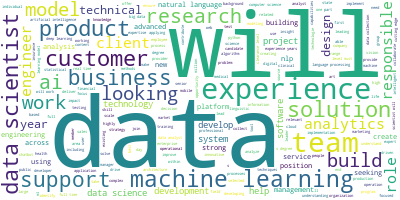

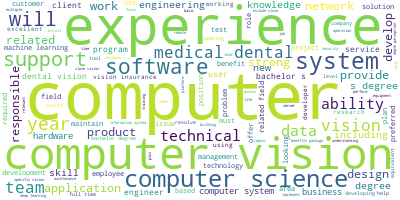

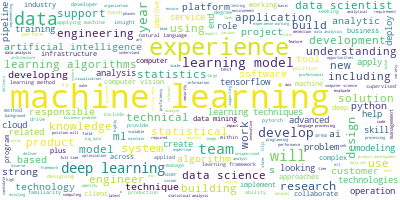

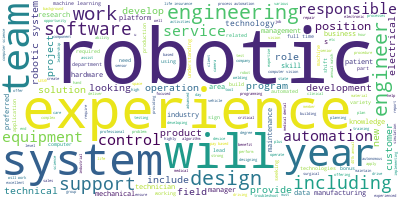

In [18]:
long_string = ','.join(list(nlp_jobs['paper_text_processed'].values))
display(generate_word_colud(long_string))

long_string = ','.join(list(cv_jobs['paper_text_processed'].values))
display(generate_word_colud(long_string))

long_string = ','.join(list(ml_jobs['paper_text_processed'].values))
display(generate_word_colud(long_string))

long_string = ','.join(list(robo_jobs['paper_text_processed'].values))
display(generate_word_colud(long_string))

In [19]:
nlp_jobs_words  = tokenize_and_eliminate_stop_words(nlp_jobs,STOP_WORDS_NLP)

cv_jobs_words  = tokenize_and_eliminate_stop_words(cv_jobs,STOP_WORDS_NLP)

ml_jobs_words  = tokenize_and_eliminate_stop_words(ml_jobs,STOP_WORDS_NLP)

robo_jobs_words  = tokenize_and_eliminate_stop_words(robo_jobs,STOP_WORDS_NLP)

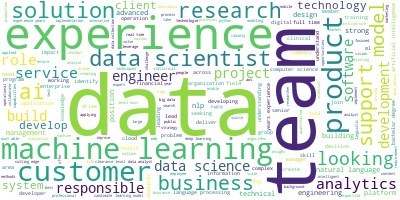

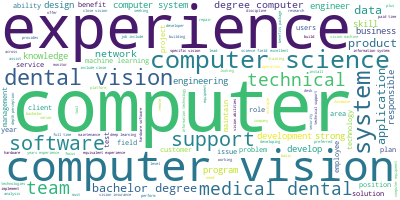

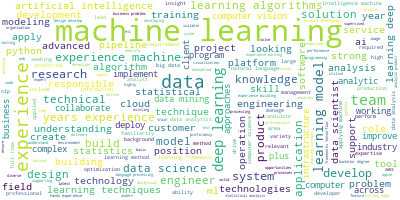

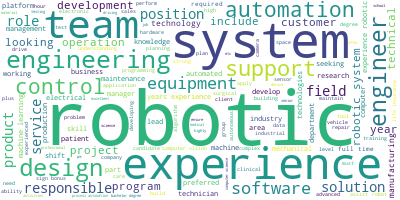

In [20]:
# Join the different processed titles together.
words = [" ".join(w) for w in nlp_jobs_words]
long_string = ','.join(words)

display(generate_word_colud(long_string))

# Join the different processed titles together.
words = [" ".join(w) for w in cv_jobs_words]
long_string = ','.join(words)

display(generate_word_colud(long_string))

# Join the different processed titles together.
words = [" ".join(w) for w in ml_jobs_words]
long_string = ','.join(words)

display(generate_word_colud(long_string))


# Join the different processed titles together.
words = [" ".join(w) for w in robo_jobs_words]
long_string = ','.join(words)

display(generate_word_colud(long_string))

In [21]:
num_topics = 15
NLP_jobs_model = generate_corpus_and_lda_model(nlp_jobs_words,num_topics = num_topics)
CV_jobs_model = generate_corpus_and_lda_model(cv_jobs_words,num_topics = num_topics)
ML_jobs_model = generate_corpus_and_lda_model(ml_jobs_words,num_topics = num_topics)
ROBO_jobs_model = generate_corpus_and_lda_model(robo_jobs_words,num_topics = num_topics)

[(0, '0.016*"data" + 0.011*"time" + 0.010*"business" + 0.010*"technical" + 0.009*"science" + 0.008*"customers" + 0.007*"closely" + 0.007*"arabic" + 0.006*"deep" + 0.005*"problems"'), (1, '0.017*"data" + 0.012*"team" + 0.010*"end" + 0.009*"customer" + 0.009*"solutions" + 0.008*"marketing" + 0.008*"machine" + 0.008*"role" + 0.007*"experience" + 0.007*"learning"'), (2, '0.028*"data" + 0.016*"team" + 0.009*"research" + 0.009*"analytics" + 0.009*"language" + 0.008*"understand" + 0.008*"experience" + 0.008*"strong" + 0.007*"business" + 0.007*"technical"'), (3, '0.043*"data" + 0.023*"experience" + 0.009*"research" + 0.009*"learning" + 0.008*"software" + 0.008*"years" + 0.008*"engineering" + 0.008*"team" + 0.008*"analysis" + 0.007*"models"'), (4, '0.028*"data" + 0.013*"business" + 0.008*"must" + 0.008*"analytics" + 0.008*"science" + 0.007*"customers" + 0.007*"time" + 0.007*"design" + 0.007*"customer" + 0.006*"solutions"'), (5, '0.009*"learning" + 0.009*"engineering" + 0.009*"models" + 0.009*"d

In [22]:
# NLP_model = generate_corpus_and_lda_model(NLP_data_words,num_topics = num_topics)
# CV_model = generate_corpus_and_lda_model(CV_data_words,num_topics = num_topics)
# ML_model = generate_corpus_and_lda_model(ML_data_words,num_topics = num_topics)

In [32]:
mdiff, annotation = NLP_model[0].diff(NLP_jobs_model[0], distance='jaccard')
# mdiff, annotation = NLP_jobs_model[0].diff(CV_jobs_model[0], distance='jaccard')

plot_difference_plotly(mdiff, title="Topic difference (two models)[jaccard distance]", annotation=annotation)

In [33]:
mdiff, annotation = CV_model[0].diff(CV_jobs_model[0], distance='jaccard')
plot_difference_plotly(mdiff, title="Topic difference (two models)[jaccard distance]", annotation=annotation)


In [34]:
mdiff, annotation = ML_model[0].diff(ML_jobs_model[0], distance='jaccard')
plot_difference_plotly(mdiff, title="Topic difference (two models)[jaccard distance]", annotation=annotation)


In [35]:
mdiff, annotation = rob_model[0].diff(ROBO_jobs_model[0], distance='jaccard')
plot_difference_plotly(mdiff, title="Topic difference (two models)[jaccard distance]", annotation=annotation)

In [36]:
mdiff, annotation = NLP_model[0].diff(NLP_model[0], distance='jaccard')
plot_difference_plotly(mdiff, title="Topic difference (two models)[jaccard distance]", annotation=annotation)


In [43]:
mdiff, annotation = CV_model[0].diff(CV_jobs_model[0], distance='hellinger')
plot_difference_plotly(mdiff, title="Topic difference (two models)[jaccard distance]", annotation=annotation)


ValueError: operands could not be broadcast together with shapes (84453,) (2831,) 

In [ ]:
mdiff, annotation = ML_model[0].diff(ML_jobs_model[0], distance='hellinger')
plot_difference_plotly(mdiff, title="Topic difference (two models)[jaccard distance]", annotation=annotation)


In [ ]:
mdiff, annotation = rob_model[0].diff(ROBO_jobs_model[0], distance='hellinger')
plot_difference_plotly(mdiff, title="Topic difference (two models)[jaccard distance]", annotation=annotation)
